### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import abline_plot

In [2]:
# Load the CSV file(s) as reviews.

import os

os.chdir("E:/Tasks/Oscar/task4")

reviews = pd.read_csv("turtle_reviews.csv")


# View the DataFrame.

reviews.head(5)


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?

reviews.isnull().sum()


gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [ ]:
# Explore the data.


In [4]:
# Descriptive statistics.

reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [5]:
# Drop unnecessary columns.

clean_reviews = reviews.drop(['language', 'platform'], axis=1)

# View column names.

clean_reviews.keys()


Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [6]:
# Rename the column headers.

clean_reviews = clean_reviews.rename(columns = {'spending_score (1-100)':'spending_score', 'remuneration (k£)':'renumeration'})


# View column names.

clean_reviews.keys()

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [7]:
# Create a CSV file as output.

clean_reviews.to_csv("clean_reviews.csv", index =False)


In [8]:
# Import new CSV file with Pandas.

clean_reviews = pd.read_csv("clean_reviews.csv")

# View DataFrame.

clean_reviews.head(5)


,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

In [31]:
# Independent variable.

#Spending

X = clean_reviews["spending_score"]

# Dependent variable.

#Loyalty

Y = clean_reviews["loyalty_points"]


# OLS model and summary.

X = sm.add_constant(X)
model = sm.OLS(Y,X)

res = model.fit()

print(res.summary())



                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        09:44:33   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.0527     45.931     -1.

In [32]:
# Extract the estimated parameters.

print(res.params)
 

const            -75.052663
spending_score    33.061693
dtype: float64


In [21]:
# Extract the standard errors.

print(res.bse)


const             45.930554
spending_score     0.814419
dtype: float64


In [22]:
# Extract the predicted values.

ypred = res.predict(X)
print(ypred)

0       1214.353374
1       2602.944491
2        123.317497
3       2470.697718
4       1247.415067
           ...     
1995    2206.204172
1996     189.440883
1997    2933.561424
1998     453.934429
1999     189.440883
Length: 2000, dtype: float64


In [ ]:
# Set the X coefficient and the constant to generate the regression table.




# View the output.


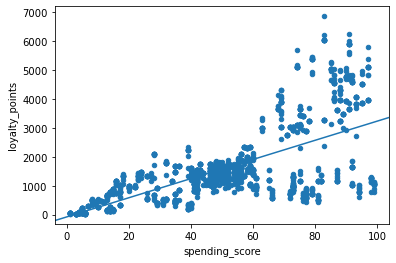

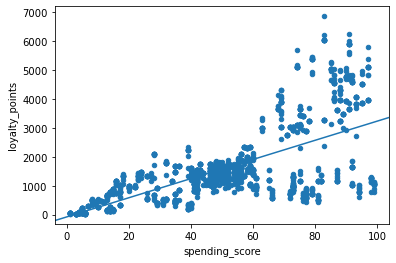

In [42]:
# Plot the graph with a regression line.

# scatter-plot data
ax = clean_reviews.plot(x='spending_score', y='loyalty_points', kind='scatter')

# plot regression line

abline_plot(model_results=model.fit(), ax=ax)


### 5b) renumeration vs loyalty

In [43]:
# Independent variable.

X = clean_reviews["renumeration"]


# Dependent variable.

Y = clean_reviews["loyalty_points"]


# OLS model and summary.

X = sm.add_constant(X)
model = sm.OLS(Y,X)

res = model.fit()

print(res.summary())


                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        09:53:57   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6865     52.171     -1.259   

In [26]:
# Extract the estimated parameters.

print(res.params)


const          -65.686513
renumeration    34.187825
dtype: float64


In [27]:
# Extract the standard errors.

print(res.bse)


const           52.170717
renumeration     0.977925
dtype: float64


In [28]:
# Extract the predicted values.

ypred = res.predict(X)
print(ypred)

0        354.823741
1        354.823741
2        382.857758
3        382.857758
4        410.891774
           ...     
1995    2821.817228
1996    3102.157397
1997    3102.157397
1998    3298.395515
1999    3102.157397
Length: 2000, dtype: float64


In [ ]:
# Set the the X coefficient and the constant to generate the regression table.


# View the output.


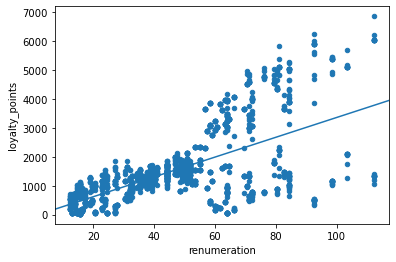

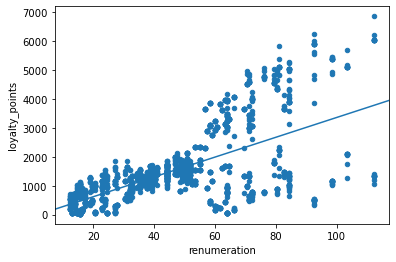

In [44]:
# Plot graph with regression line.

# scatter-plot data
ax = clean_reviews.plot(x='renumeration', y='loyalty_points', kind='scatter')

# plot regression line

abline_plot(model_results=model.fit(), ax=ax)


### 5c) age vs loyalty

In [45]:
# Independent variable.

X = clean_reviews["age"]

# Dependent variable.

Y = clean_reviews["loyalty_points"]


# OLS model and summary.


X = sm.add_constant(X)
model = sm.OLS(Y,X)

res = model.fit()

print(res.summary())


                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 12 Sep 2022   Prob (F-statistic):             0.0577
Time:                        09:55:57   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

In [47]:
# Extract the estimated parameters.

print(res.params)


const    1736.517739
age        -4.012805
dtype: float64


In [49]:
# Extract the standard errors.

print(res.bse)

const    88.248731
age       2.113177
dtype: float64


In [50]:
# Extract the predicted values.

ypred = res.predict(X)
print(ypred)


0       1664.287247
1       1644.223221
2       1648.236026
3       1636.197611
4       1604.095169
           ...     
1995    1588.043949
1996    1563.967118
1997    1600.082364
1998    1600.082364
1999    1608.107975
Length: 2000, dtype: float64


In [ ]:
# Set the X coefficient and the constant to generate the regression table.


# View the output.


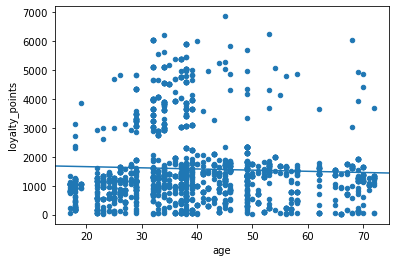

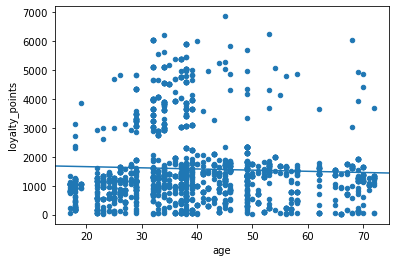

In [51]:
# Plot graph with regression line.

# scatter-plot data
ax = clean_reviews.plot(x='age', y='loyalty_points', kind='scatter')

# plot regression line

abline_plot(model_results=model.fit(), ax=ax)

## 6. Observations and insights

***Your observations here...***

Loyalty points are closely related to spending score and renumeration but not much with the age of the client.

This is evident from the regression/scatter plots.

Insights obtained from this section is that the company can use only renumeration and spending habits to accurately predict loyalty points.






# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [81]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [55]:
# Load the CSV file(s) as df2.

df2 = clean_reviews[["renumeration","spending_score"]]


# View DataFrame.

df2.head(5)


,renumeration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [ ]:
# Drop unnecessary columns.


# View DataFrame.


In [ ]:
# Explore the data.


In [56]:
# Descriptive statistics.

df2.describe()


,renumeration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

(<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>,)

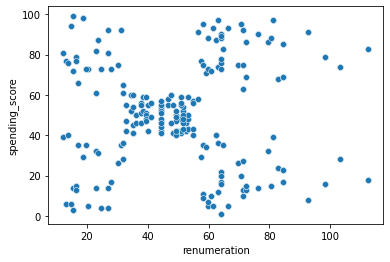

In [58]:
# Create a scatterplot with Seaborn.

sns.scatterplot(x="renumeration",
                    y="spending_score",
                    data=df2)


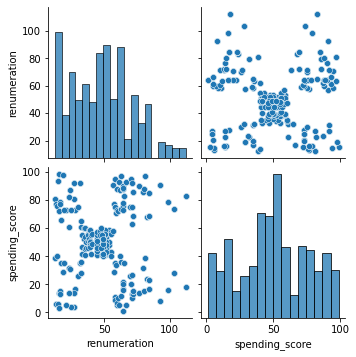

In [59]:
# Create a pairplot with Seaborn.

sns.pairplot(df2)


## 3. Elbow and silhoutte methods

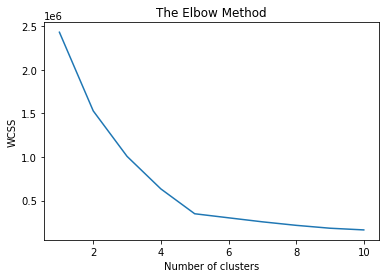

In [61]:
# Determine the number of clusters: Elbow method.

X = df2.iloc[:, [0, 1]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


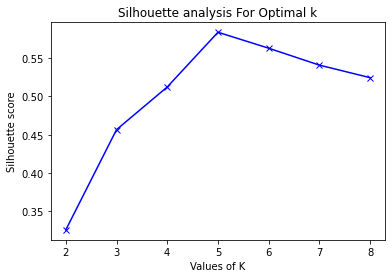

In [86]:
# Determine the number of clusters: Silhouette method.

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
        # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df2)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(df2, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')

plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()
 


## 4. Evaluate k-means model at different values of *k*

In [87]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [88]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [89]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## 5. Fit final model and justify your choice

In [ ]:
# Apply the final model.

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [92]:
# Check the number of observations per predicted class.




## 6. Plot and interpret the clusters

In [ ]:
# Visualising the clusters.


# View the DataFrame.




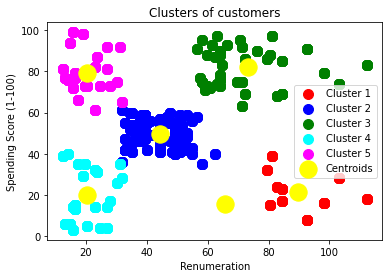

In [93]:
# Visualising the clusters.

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Renumeration')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()



## 7. Discuss: Insights and observations

***Your observations here...***

Most customers are classified in clusters 2,3,4 and 5.

The business can decide to focus on these segments as they appear to be profitable to the business.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [105]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [97]:
# Load the data set as df3.

df3 = clean_reviews[["review","summary"]]

# View DataFrame.

df3.head()


,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [ ]:
# Explore data set.


In [ ]:
# Keep necessary columns. Drop unnecessary columns.


# View DataFrame.


In [98]:
# Determine if there are any missing values.

df3.isnull().sum()


review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [ ]:
# Review: Change all to lower case and join with a space.



In [ ]:
# Summary: Change all to lower case and join with a space.


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [ ]:
# Replace all the punctuations in review column.


# View output.


In [99]:
# Replace all the puncuations in summary column.


# View output.


In [108]:
#clean review column

import re
from nltk.stem.porter import PorterStemmer


review_corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', df3['review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  review_corpus.append(review)

print(review_corpus)

['come dm screen space screen absolut premium fact space wast art not terribl inform need art well make complet useless reason gave star not technic speak least still stand block note dice roll drop ball complet', 'open letter galeforc unpaint miniatur not bad spell card great board game meh dm screen howev freak terribl still wait singl screen pollut pointless artwork use refer abl tabl creat singl use screen use run storm king thunder adventur even despit fact gear adventur path use neglig best massiv swath inner panel wast artwork bloat overland map could easili reduc singl panel size tabl nigh useless short stop make crap dm screen', 'nice art nice print two panel fill gener forgotten realm map beyond one blue ocean wast understand make dm screen use kind adventur rather sole specif adventur suppos abl transpos adventur land outsid forgotten realm even list new monster npc would least use map even would stuff relat run game broad use stuff relat giant thing curs strahd not make use

In [109]:
#summary column

summary_corpus = []
for i in range(0, 1000):
  summary = re.sub('[^a-zA-Z]', ' ', df3['summary'][i])
  summary = summary.lower()
  summary = summary.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  summary = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  summary = ' '.join(summary)
  summary_corpus.append(summary)

print(summary_corpus)

['p l   g r l f r e n   c h n g   r n k   g e   k l l   n e r   h g u n   b e e r   z   h h', 'p l   g r l f r e n   c h n g   r n k   g e   k l l   n e r   h g u n   b e e r   z   h h', 'p l   g r l f r e n   c h n g   r n k   g e   k l l   n e r   h g u n   b e e r   z   h h', 'p l   g r l f r e n   c h n g   r n k   g e   k l l   n e r   h g u n   b e e r   z   h h', 'p l   g r l f r e n   c h n g   r n k   g e   k l l   n e r   h g u n   b e e r   z   h h', 'p l   g r l f r e n   c h n g   r n k   g e   k l l   n e r   h g u n   b e e r   z   h h', 'p l   g r l f r e n   c h n g   r n k   g e   k l l   n e r   h g u n   b e e r   z   h h', 'p l   g r l f r e n   c h n g   r n k   g e   k l l   n e r   h g u n   b e e r   z   h h', 'p l   g r l f r e n   c h n g   r n k   g e   k l l   n e r   h g u n   b e e r   z   h h', 'p l   g r l f r e n   c h n g   r n k   g e   k l l   n e r   h g u n   b e e r   z   h h', 'p l   g r l f r e n   c h n g   r n k   g e   k l l   n e r   h g u 

### 2c) Drop duplicates in both columns

In [119]:
# Drop duplicates in both columns.

df3_review = pd.DataFrame (review_corpus, columns = ['review'])

df3_review.drop_duplicates()


# View DataFrame.

df3_review.head()


,review
0,come dm screen space screen absolut premium fa...
1,open letter galeforc unpaint miniatur not bad ...
2,nice art nice print two panel fill gener forgo...
3,amaz buy bought gift new dm perfect
4,review gf previou screen complet unnecessari n...


In [120]:
df3_summary = pd.DataFrame (summary_corpus, columns = ['summary'])

df3_summary.drop_duplicates()


# View DataFrame.

df3_summary.head()

,summary
0,p l g r l f r e n c h n g r n k g e ...
1,p l g r l f r e n c h n g r n k g e ...
2,p l g r l f r e n c h n g r n k g e ...
3,p l g r l f r e n c h n g r n k g e ...
4,p l g r l f r e n c h n g r n k g e ...


## 3. Tokenise and create wordclouds

In [122]:
# Create new DataFrame (copy DataFrame).

df4 = pd.concat([df3_review.reset_index(drop=True), df3_summary], axis=1)


# View DataFrame.

df4.head()


,review,summary
0,come dm screen space screen absolut premium fa...,p l g r l f r e n c h n g r n k g e ...
1,open letter galeforc unpaint miniatur not bad ...,p l g r l f r e n c h n g r n k g e ...
2,nice art nice print two panel fill gener forgo...,p l g r l f r e n c h n g r n k g e ...
3,amaz buy bought gift new dm perfect,p l g r l f r e n c h n g r n k g e ...
4,review gf previou screen complet unnecessari n...,p l g r l f r e n c h n g r n k g e ...


In [141]:
# Apply tokenisation to both columns.


# View DataFrame.




In [144]:
# Review: Create a word cloud.

from wordcloud import WordCloud, STOPWORDS

review_str = ' '.join(map(str, review_corpus))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review_str)
    

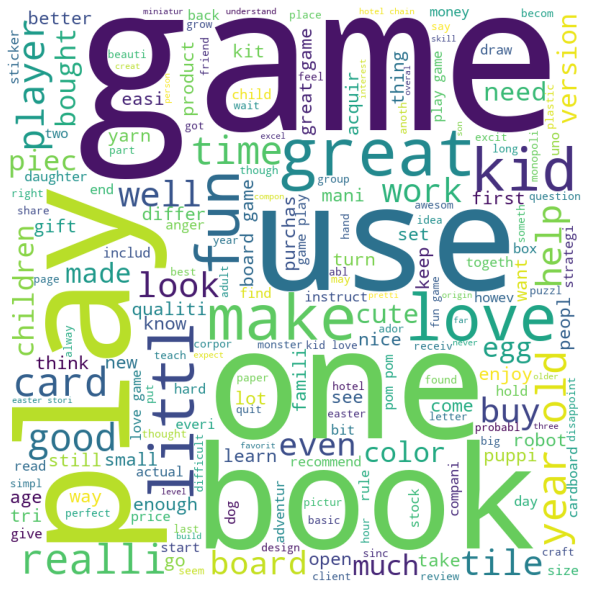

In [145]:
# Review: Plot the WordCloud image.
                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


In [146]:
# Summary: Create a word cloud.

summary_str = ' '.join(map(str, summary_corpus))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(summary_str)


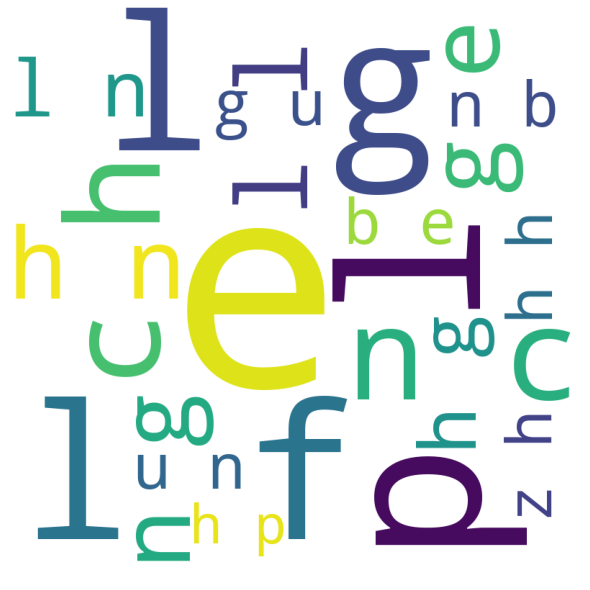

In [147]:
# Summary: Plot the WordCloud image.

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [150]:
# Determine the frequency distribution.

fd = nltk.FreqDist(review_corpus)

fd.most_common(5)


[('love', 8), ('great', 7), ('cute', 4), ('great game', 4), ('good', 3)]

In [151]:
fd1 = nltk.FreqDist(summary_corpus)
fd1.most_common(5)

[('p l   g r l f r e n   c h n g   r n k   g e   k l l   n e r   h g u n   b e e r   z   h h',
  1000)]

### 4b) Remove alphanumeric characters and stopwords

In [ ]:
# Delete all the alpanum.


In [ ]:
# Remove all the stopwords


### 4c) Create wordcloud without stopwords

In [152]:
# Create a wordcloud without stop words.

review_str = ' '.join(map(str, review_corpus))


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(review_str)


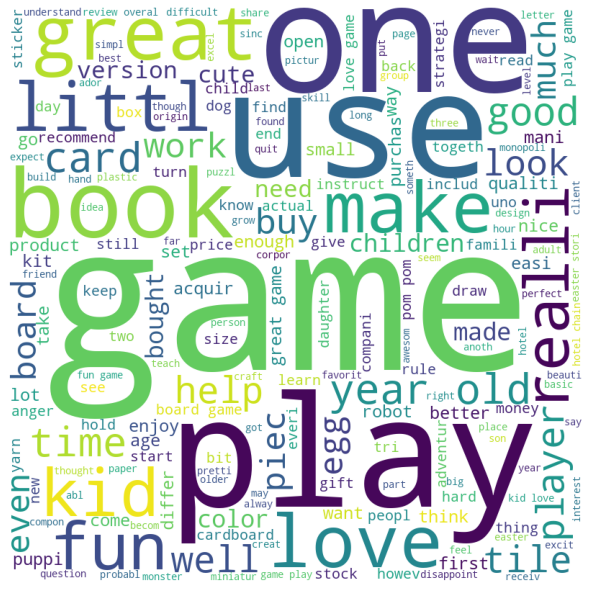

In [153]:
# Plot the wordcloud image.

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


### 4d) Identify 15 most common words and polarity

In [156]:
# Determine the 15 most common words.

fd.most_common(15)


[('love', 8),
 ('great', 7),
 ('cute', 4),
 ('great game', 4),
 ('good', 3),
 ('grandson love', 2),
 ('niec love', 2),
 ('kid love', 2),
 ('awesom', 2),
 ('come dm screen space screen absolut premium fact space wast art not terribl inform need art well make complet useless reason gave star not technic speak least still stand block note dice roll drop ball complet',
  1),
 ('open letter galeforc unpaint miniatur not bad spell card great board game meh dm screen howev freak terribl still wait singl screen pollut pointless artwork use refer abl tabl creat singl use screen use run storm king thunder adventur even despit fact gear adventur path use neglig best massiv swath inner panel wast artwork bloat overland map could easili reduc singl panel size tabl nigh useless short stop make crap dm screen',
  1),
 ('nice art nice print two panel fill gener forgotten realm map beyond one blue ocean wast understand make dm screen use kind adventur rather sole specif adventur suppos abl transpos adv

In [160]:
#polarity scores

from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
 
sia = SentimentIntensityAnalyzer()


scores = sia.polarity_scores(review_str)
print(scores)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.049, 'neu': 0.656, 'pos': 0.295, 'compound': 1.0}


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [161]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [162]:
# Determine polarity of both columns. 

generate_polarity(review_str)


# View output.


0.10421198423548494

In [163]:
generate_polarity(summary_str)

0.0

In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity




# Histogram of sentiment score


In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.


# View output.


In [ ]:
# Top 20 negative summaries.


# View output.


In [ ]:
# Top 20 positive reviews.


# View output.


In [ ]:
# Top 20 positive summaries.


# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

# 